## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

Description: 
I chose the following variables, Job Statisfaction, Work Status, Hours worked per week, Occupational prestige score, Respondent's age, and Income level. I'm curious to see if the following variables have any correlation with job satisfaction. 

In [ ]:
# !pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('../data/GSS.xlsx')
df.head()
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75699 entries, 0 to 75698
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      75699 non-null  int64 
 1   id_       75699 non-null  int64 
 2   wrkstat   75699 non-null  object
 3   hrs1      75699 non-null  object
 4   prestige  75699 non-null  object
 5   age       75699 non-null  object
 6   income    75699 non-null  object
 7   satjob    75699 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.6+ MB


(75699, 8)

In [5]:
df.isnull().sum()

year        0
id_         0
wrkstat     0
hrs1        0
prestige    0
age         0
income      0
satjob      0
dtype: int64

In [46]:
df = df[~df['wrkstat'].str.startswith('.')]
df['wrkstat'].value_counts()


wrkstat
Working full time                                                             36727
Retired                                                                       11683
Keeping house                                                                 11061
Working part time                                                              7750
Unemployed, laid off, looking for work                                         2796
In school                                                                      2277
Other                                                                          1740
With a job, but not at work because of temporary illness, vacation, strike     1618
Name: count, dtype: int64

In [47]:
df = df[~df['hrs1'].str.startswith('.')]
df['hrs1'].value_counts()

hrs1
40    15216
50     3270
45     2219
60     2214
30     1456
      ...  
83        9
81        5
79        3
71        3
87        3
Name: count, Length: 90, dtype: int64

In [48]:
df = df[~df['prestige'].str.startswith('.')]
df['prestige'].value_counts()

prestige
50    1377
36    1017
32     605
34     582
46     574
      ... 
53      12
66      10
70       8
65       1
21       1
Name: count, Length: 62, dtype: int64

In [49]:
df = df[~df['age'].str.startswith('.')]
df['age'].value_counts()

age
27             457
28             452
25             437
32             425
30             424
              ... 
82               2
87               2
84               1
89 or older      1
86               1
Name: count, Length: 71, dtype: int64

In [52]:
df = df[~df['income'].str.startswith('.')]
df['income'].value_counts()

income
$25,000 or more       4966
$10,000 to $14,999    2168
$15,000 to $19,999    1768
$20,000 to $24,999    1695
$8,000 to $9,999       682
$7,000 to $7,999       379
$6,000 to $6,999       325
$5,000 to $5,999       278
$3,000 to $3,999       227
$4,000 to $4,999       219
$1,000 to $2,999       214
Under $1,000            86
Name: count, dtype: int64

In [51]:
df = df[~df['satjob'].str.startswith('.')]
df['satjob'].value_counts()

satjob
Very satisfied           6369
Moderately satisfied     4893
A little dissatisfied    1265
Very dissatisfied         480
Name: count, dtype: int64

For cleaning, since there's not really null value, I removed special case responds, and they made it pretty easy by having a . in it as the variable name.

In [ ]:
pd.crosstab(df['satjob'], df['wrkstat'])

wrkstat,Working full time,Working part time
satjob,,
A little dissatisfied,1048,217
Moderately satisfied,4039,854
Very dissatisfied,363,117
Very satisfied,5374,995


In [ ]:
pd.crosstab(df['satjob'], df['income'])


income,"$1,000 to $2,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 or more","$3,000 to $3,999","$4,000 to $4,999","$5,000 to $5,999","$6,000 to $6,999","$7,000 to $7,999","$8,000 to $9,999","Under $1,000"
satjob,,,,,,,,,,,,
A little dissatisfied,34,238,169,167,399,29,26,31,44,44,73,11
Moderately satisfied,74,871,645,696,1754,88,85,103,121,154,271,31
Very dissatisfied,21,85,75,59,121,17,17,16,6,19,34,10
Very satisfied,85,974,879,773,2692,93,91,128,154,162,304,34


In [24]:
pd.crosstab(df['satjob'], df['hrs1'])

hrs1,0,1,10,11,12,13,14,15,16,17,...,81,82,83,84,85,86,87,88,89+ hrs,9
satjob,,,,,,,,,,,,,,,,,,,,,
A little dissatisfied,0,0,8,1,6,2,2,12,15,2,...,0,0,0,0,0,0,0,0,11,2
Moderately satisfied,2,4,44,3,33,4,10,62,48,10,...,1,0,0,6,2,0,0,1,21,15
Very dissatisfied,0,0,4,1,5,3,1,8,10,0,...,0,0,0,1,1,0,0,0,1,2
Very satisfied,3,0,51,3,43,8,12,92,79,9,...,0,2,3,22,7,2,1,3,58,8


In [25]:
pd.crosstab(df['satjob'], df['prestige'])

prestige,12,14,15,16,17,18,19,20,21,22,...,67,68,69,70,71,72,74,76,78,82
satjob,,,,,,,,,,,,,,,,,,,,,
A little dissatisfied,16,7,12,21,56,27,14,34,0,42,...,6,3,2,1,4,6,0,3,6,2
Moderately satisfied,34,25,28,58,145,79,42,100,1,95,...,20,17,35,1,12,27,9,28,36,10
Very dissatisfied,11,3,5,5,21,13,9,9,0,31,...,1,0,2,0,0,1,0,4,3,0
Very satisfied,39,21,19,59,134,94,37,71,0,90,...,31,31,69,6,28,61,12,47,74,26


In [26]:
pd.crosstab(df['satjob'], df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,79,80,81,82,83,84,85,86,87,89 or older
satjob,,,,,,,,,,,,,,,,,,,,,
A little dissatisfied,3,37,27,38,27,40,56,55,58,45,...,0,0,0,0,0,0,0,0,0,0
Moderately satisfied,12,80,87,114,130,164,144,181,142,200,...,1,0,0,0,0,1,1,1,0,0
Very dissatisfied,3,12,10,15,17,18,18,18,18,12,...,0,0,0,0,0,0,0,0,0,0
Very satisfied,9,35,62,90,99,124,157,168,155,180,...,3,4,3,2,3,0,2,0,1,1


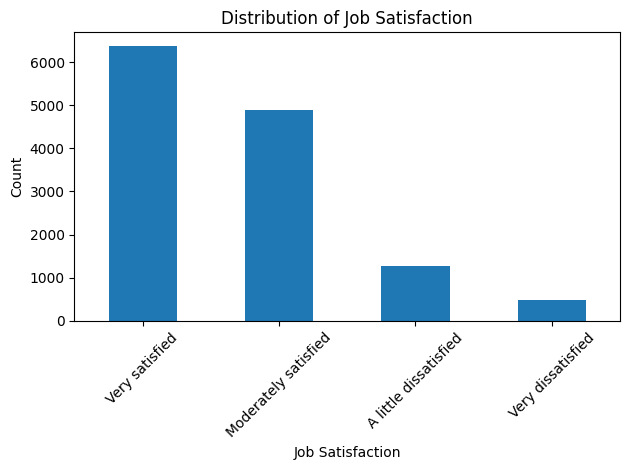

In [63]:
df['satjob'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


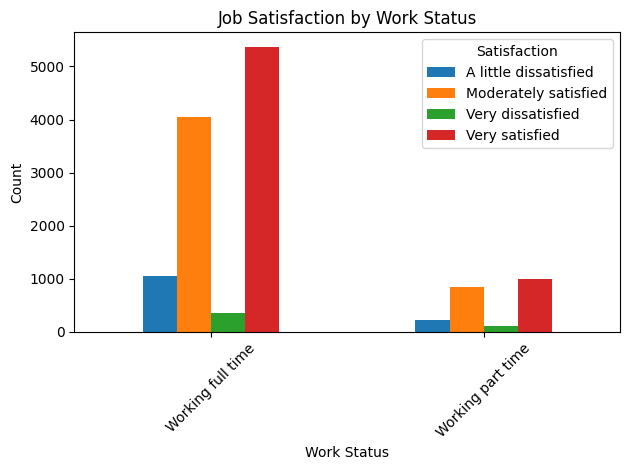

In [64]:
pd.crosstab(df['wrkstat'], df['satjob']).plot(kind='bar')
plt.title('Job Satisfaction by Work Status')
plt.xlabel('Work Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


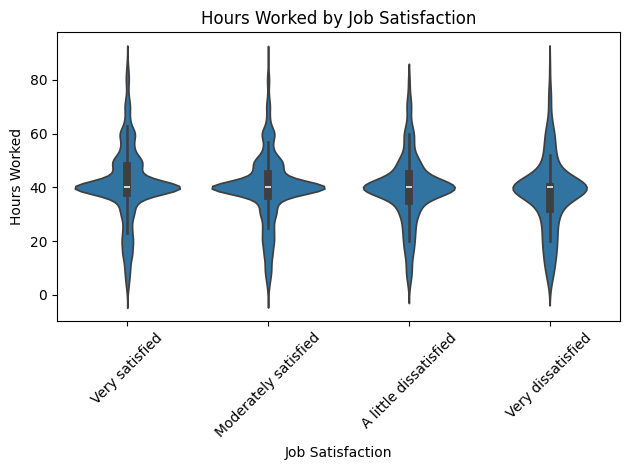

In [65]:
df["hrs1"] = pd.to_numeric(df["hrs1"], errors="coerce") #debuged with chat, was having labels cramped issue
sns.violinplot(x='satjob', y='hrs1', data=df)
plt.title('Hours Worked by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Hours Worked')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

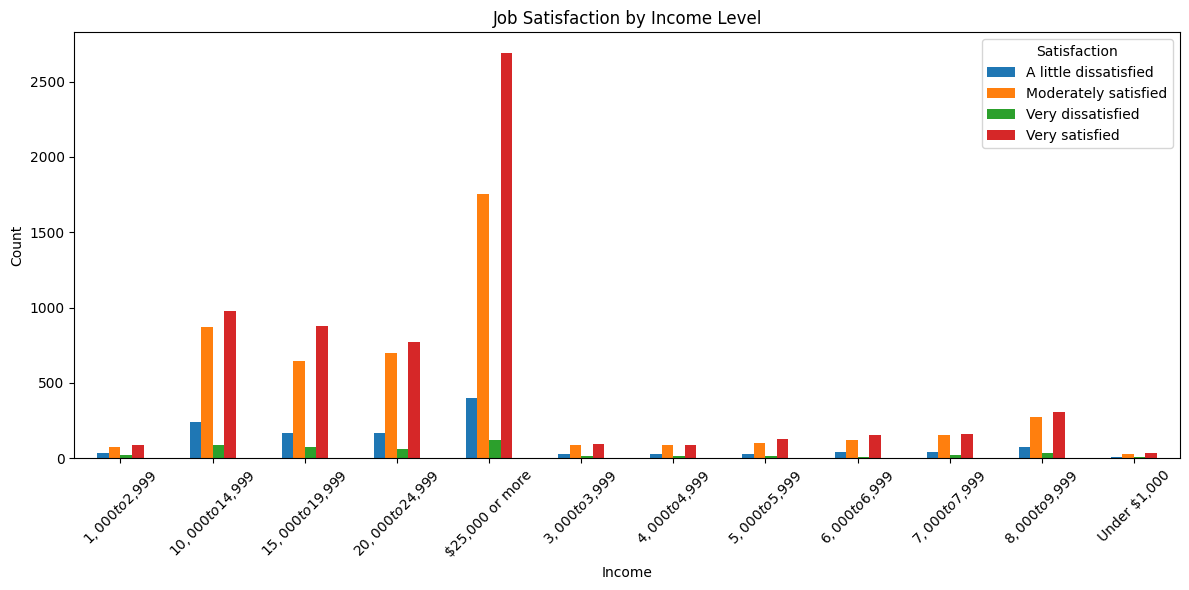

In [ ]:
pd.crosstab(df['income'], df['satjob']).plot(kind='bar', figsize=(12, 6)) #chat helped with this
plt.title('Job Satisfaction by Income Level')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


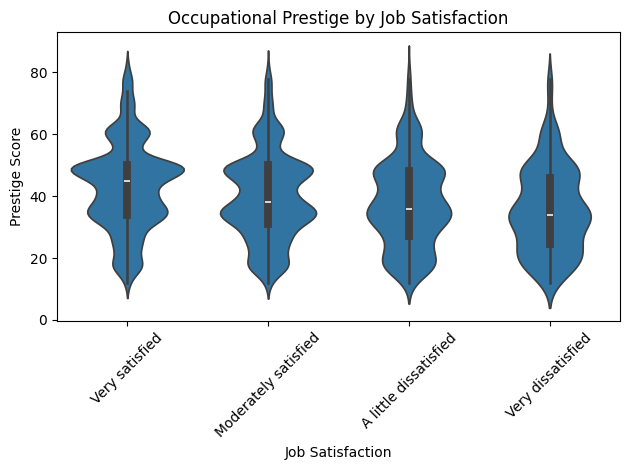

In [ ]:
df["prestige"] = pd.to_numeric(df["prestige"], errors="coerce") #debuged with chat, was having labels cramped issue
sns.violinplot(x='satjob', y='prestige', data=df)
plt.title('Occupational Prestige by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Prestige Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


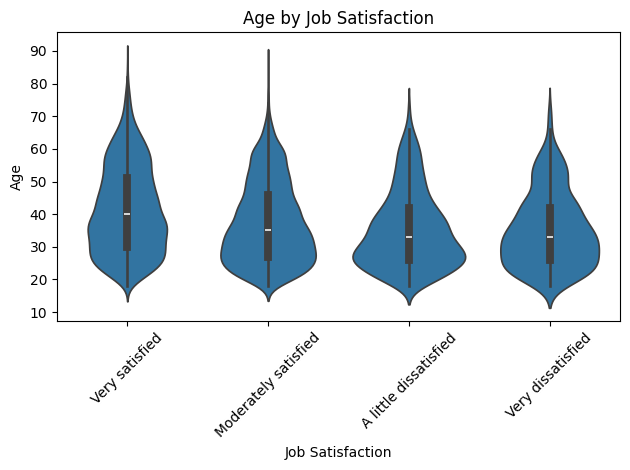

In [ ]:
df["age"] = pd.to_numeric(df["age"], errors="coerce") #debuged with chat, was having labels cramped issue
sns.violinplot(x='satjob', y='age', data=df)
plt.title('Age by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


For my finding, it seems that people with a full time job are usually satisfied with their work, similar correlation with part time job. As long as they have a source of income, they are usually happy. 

As for hours worked, there's no exact correlation found, people either like their job or they don't, regardless of how many hours they work. 

For income level, there is trend where the more money you make, the more satisfied with job you are, with the highest peak for high salary individuals.

Occupational prestige also didn't matter, they don't really care about the title of their job from the analysis.

Same with age, it doesn't influence how much they like their job.